<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Nearest neighbor methods </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 22, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is a nearest neighbor method?
<hr style="height:1px;border:none" />

## I want to fit in like everybody else

Say, there are two classes of data points. And you have a new observation to be classified into one of the two classes. 

In [2]:
%matplotlib inline

`<kNN_2Clusters.py>`

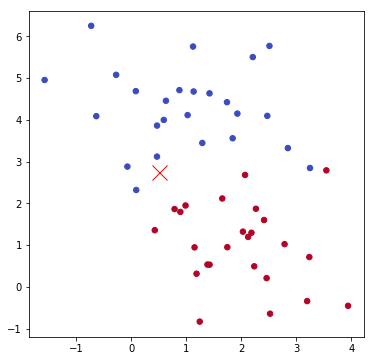

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, x, y, h=.02, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(x, y, h)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)


# plotting the toy data plus a new observation
x_new = 0.5
y_new = 2.75
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.plot(x_new, y_new, marker='x', c='r', ms=15)
plt.show()

See the new observation (red X). Should this be classified as blue or red? We can classify based on the observations around it.

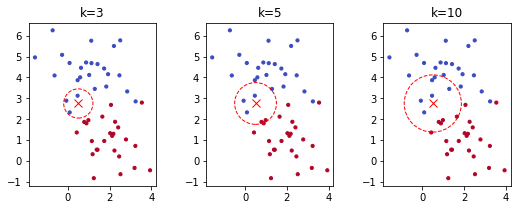

In [4]:
# k nearest neighbors
plt.figure(figsize=[9,3])
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=0.7, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=3')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.0, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=5')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.37, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=10')

plt.show()

These plots show circles encompassing $k$ ($k=3$, $5$, and $10$) nearest neighbors of the new observation. We can classify the new observation as the most abundant class in each of the circles. In this case,
  * $k=3$: Blue=3 $\rightarrow$ Classified as Blue
  * $k=5$: Blue=3, Red=2 $\rightarrow$ Classified as Blue
  * $k=10$: Blue=6, Red=4 $\rightarrow$ Classified as Blue

As you can see, voting among $k$ nearest neighbors enables classification of a new observation without an explicit model. This classification method is known as the **k nearest neighbor** method. 

[Implementation in sklearn, with examples]

* What is NN
  * radius based vs. k
  * distance weights
  * ties and k to be avoided
* Example
* Example 2 (a.k.a., exercise)
* Curse of dimensionality